## 练习

1. 试着增加迭代轮数。对比LeNet的结果有什么不同？为什么？
1. AlexNet对Fashion-MNIST数据集来说可能太复杂了。
    1. 尝试简化模型以加快训练速度，同时确保准确性不会显著下降。
    1. 设计一个更好的模型，可以直接在$28 \times 28$图像上工作。
1. 修改批量大小，并观察模型精度和GPU显存变化。
1. 分析了AlexNet的计算性能。
    1. 在AlexNet中主要是哪部分占用显存？
    1. 在AlexNet中主要是哪部分需要更多的计算？
    1. 计算结果时显存带宽如何？
1. 将dropout和ReLU应用于LeNet-5，效果有提升吗？再试试预处理会怎么样？

### 练习 1. 试着增加迭代轮数。对比LeNet的结果有什么不同？为什么？

loss 0.248, train acc 0.909, test acc 0.903
1332.2 examples/sec on cuda:0


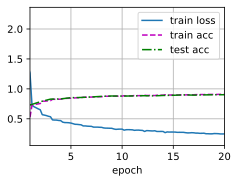

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

# 定义AlexNet网络
net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 10)
)

# 数据准备
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

# 训练参数设置
lr, num_epochs = 0.01, 20  # 增加迭代轮数到20

# 训练模型
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

# 对比LeNet的结果
# LeNet由于其简单的结构和较少的参数，可能不需要这么多迭代轮数来收敛。
# AlexNet由于其更深的结构和更多的参数，可以从更多的迭代轮数中受益，尤其是在更复杂的数据集上。
# 但需要注意的是，AlexNet在简单数据集上可能更容易过拟合。

### 练习 2. AlexNet对Fashion-MNIST数据集来说可能太复杂了。
   1. 尝试简化模型以加快训练速度，同时确保准确性不会显著下降。
   1. 设计一个更好的模型，可以直接在$28 \times 28$图像上工作。

loss 0.347, train acc 0.874, test acc 0.876
3409.5 examples/sec on cuda:0


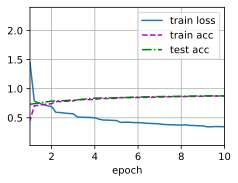

In [3]:
import torch
from torch import nn
from d2l import torch as d2l

# 简化的AlexNet模型
simplified_net = nn.Sequential(
    nn.Conv2d(1, 48, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(48, 128, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(128, 192, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(192, 192, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(192, 128, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    nn.Linear(3200, 2048), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(2048, 2048), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(2048, 10)
)

# 数据准备
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

# 训练参数设置
lr, num_epochs = 0.01, 10

# 训练简化的模型
d2l.train_ch6(simplified_net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.467, train acc 0.830, test acc 0.832
33562.8 examples/sec on cuda:0


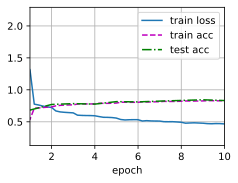

In [4]:
# 为28x28图像设计的轻量级模型
lightweight_net = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(64 * 7 * 7, 256), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(256, 10)
)

# 数据准备（不改变图像尺寸）
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=None)

# 训练轻量级模型
d2l.train_ch6(lightweight_net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

### 练习 3. 修改批量大小，并观察模型精度和GPU显存变化。

loss 0.397, train acc 0.853, test acc 0.845
1776.7 examples/sec on cuda:0


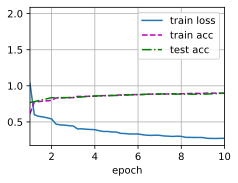

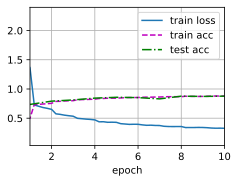

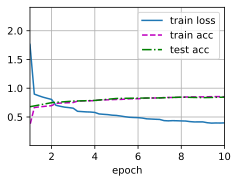

In [5]:
import torch
from torch import nn
from d2l import torch as d2l

# 定义AlexNet网络
net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 10)
)

# 训练参数设置
lr, num_epochs = 0.01, 10

# 为不同的批量大小进行训练
for batch_size in [64, 128, 256]:
    print(f"Training with batch size: {batch_size}")
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
    d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

### 练习 4. 分析了AlexNet的计算性能。
   1. 在AlexNet中主要是哪部分占用显存？
   1. 在AlexNet中主要是哪部分需要更多的计算？
   1. 计算结果时显存带宽如何？

In [7]:
import torch
from torch import nn

# 定义AlexNet网络
net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 10)
)

# 打印每层的参数数量和输出形状
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, "output shape: \t", X.shape)
    if hasattr(layer, 'weight'):
        print("Weight shape:", layer.weight.shape, "Parameters:", layer.weight.nelement())
    if hasattr(layer, 'bias') and layer.bias is not None:
        print("Bias shape:", layer.bias.shape, "Parameters:", layer.bias.nelement())

Conv2d output shape: 	 torch.Size([1, 96, 54, 54])
Weight shape: torch.Size([96, 1, 11, 11]) Parameters: 11616
Bias shape: torch.Size([96]) Parameters: 96
ReLU output shape: 	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape: 	 torch.Size([1, 96, 26, 26])
Conv2d output shape: 	 torch.Size([1, 256, 26, 26])
Weight shape: torch.Size([256, 96, 5, 5]) Parameters: 614400
Bias shape: torch.Size([256]) Parameters: 256
ReLU output shape: 	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape: 	 torch.Size([1, 256, 12, 12])
Conv2d output shape: 	 torch.Size([1, 384, 12, 12])
Weight shape: torch.Size([384, 256, 3, 3]) Parameters: 884736
Bias shape: torch.Size([384]) Parameters: 384
ReLU output shape: 	 torch.Size([1, 384, 12, 12])
Conv2d output shape: 	 torch.Size([1, 384, 12, 12])
Weight shape: torch.Size([384, 384, 3, 3]) Parameters: 1327104
Bias shape: torch.Size([384]) Parameters: 384
ReLU output shape: 	 torch.Size([1, 384, 12, 12])
Conv2d output shape: 	 torch.Size([1, 256, 12, 12])
Weigh

4.3 - 显存带宽
关于显存带宽的计算，这通常涉及到硬件级别的性能监控，而不是通过简单的Python代码来完成。可以使用特定的性能监控工具来跟踪在模型训练过程中显存带宽的使用情况。这通常涉及到GPU硬件的具体细节，超出了一般的Python编程范围。

### 练习 5. 将dropout和ReLU应用于LeNet-5，效果有提升吗？再试试预处理会怎么样？

loss 0.649, train acc 0.762, test acc 0.806
32777.0 examples/sec on cuda:0


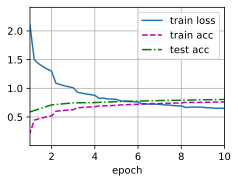

In [8]:
import torch
from torch import nn
from d2l import torch as d2l

# 修改后的LeNet-5，加入Dropout和ReLU
class ModifiedLeNet5(nn.Module):
    def __init__(self):
        super(ModifiedLeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, padding=2)  # padding=2 to keep input and output size same
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.relu3 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.dropout1(self.relu3(self.fc1(x)))
        x = self.dropout2(self.relu4(self.fc2(x)))
        x = self.fc3(x)
        return x

# 创建模型实例
modified_lenet5 = ModifiedLeNet5()

# 数据准备
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# 训练参数设置
lr, num_epochs = 0.01, 10

# 训练模型
d2l.train_ch6(modified_lenet5, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())